In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy as sp

In [3]:
import string

In [4]:
import re

# Introduction

Datahack URL: https://datahack.analyticsvidhya.com/contest/linguipedia-codefest-natural-language-processing-1/
https://datahack.analyticsvidhya.com/contest/practice-problem-identify-the-sentiments/

In [5]:
train = pd.read_csv('train.csv')

In [6]:
pd.options.display.max_colwidth=100

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [8]:
train.head(10)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #iger...
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…...
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connec...
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr....
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19....
5,6,1,iPhone software update fucked up my phone big time Stupid iPhones
6,7,0,Happy for us .. #instapic #instadaily #us #sony #xperia #xperiaZ https://instagram.com/p/z9qGfWl...
7,8,0,New Type C charger cable #UK http://www.ebay.co.uk/itm/-/112598674021 … #bay #Amazon #etsy New Y...
8,9,0,Bout to go shopping again listening to music #iphone #justme #music #likeforlike #followforfollo...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera #picoftheday #sun #instagood #boy #cute #outdoor....


In [9]:
train['id'].is_unique

True

In [10]:
train['label'].value_counts()

label
0    5894
1    2026
Name: count, dtype: int64

In [11]:
train['label'].value_counts(normalize=True)

label
0    0.744192
1    0.255808
Name: proportion, dtype: float64

In [12]:
train[train['label']==1].head(10)

,id,label,tweet
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19....
5,6,1,iPhone software update fucked up my phone big time Stupid iPhones
10,11,1,hey #apple when you make a new ipod dont make it a new color or .2inches thinner make it not cra...
11,12,1,Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that ...
12,13,1,Contemplating giving in to the iPhone bandwagon simply because #Cellcom has no new Androids #dep...
14,15,1,@shaqlockholmes @sam_louise1991 the battery is so painful! I charge it overnight and by lunchtim...
18,19,1,The reason I don't have one. #iphone #suck #apple #truth #truthbetold #agree #fact #realitycheck...
19,20,1,How is the apple store gunna be out of 5C screens ?!? It's Monday and ur the FUCKING APPLE STORE...
22,23,1,I've had this new ipod for four days? And this of button on the back broke... I accidentally hit...
23,24,1,when your iPhone screen goes completely black and you keep getting texts all day but you can't F...


In [13]:
train.sample(10)

,id,label,tweet
4564,4565,0,Just for fun #instagram #instafun #funny #myself #me #android #samsung #androidnesia http://inst...
1405,1406,0,Fuck you #Sony you keep showing me why I haven't bought your console. Fuck #Skylanders not showi...
7850,7851,0,Westpark in the morning. #setlife #film #work #push #westpark #sony #fs700 #gopro #shoot… https:...
4674,4675,0,New phone case :) #new #case #phone #samsung #beautiful #newin #clock #beach #window #Cadiz… htt...
3090,3091,0,I my @LeadingTheWayAu #iPhone #App jst downloaded it and listened 2 first MSG!!!
6077,6078,1,iPhone 5 seems like a waste. Looks like they are going to the dark side. Droids #apple #shark #Audi
846,847,0,Gain Followers RT This MUST FOLLOW ME I FOLLOW BACK Follow everyone who rts Gain #iphone #sougof...
3329,3330,0,http://www.WiFiNOW.Mobi | Lake joy #iphone #android #htc #samsung #app #wifi #freepic.twitter.co...
3836,3837,0,RT @liess__ Long time ago #instagram #iphone #contrast #friends #highschool #fun http://instagr....
1334,1335,0,Huge Savings! 2-Pack 9 Feet Apple MFi Certified Car Charger with Lightning Connector for $9.95 (...


# Data Cleaning

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
punctuation = string.punctuation

In [16]:
def clean_text(text):
    text_clean = []
    for i in text:
        if i not in punctuation:
            text_clean.append(i.lower())
    return ''.join(text_clean)

In [17]:
clean_text(train.iloc[3914, 2])

'woohoo best gift from dad pc tablet sony xperia make believe picsforlikes instagram httpinstagramcompyiazt9i92p'

In [18]:
def clean_text(text):
    text_clean = re.findall(r'[a-zA-Z0-9\']+', text)
    return ' '.join(text_clean)

In [19]:
clean_text(train.iloc[3914, 2])

'Woohoo best gift from dad pc tablet sony xperia make believe picsforlikes instagram http instagram com p YiazT9I92P'

In [20]:
train['clean tweet'] = train['tweet'].apply(lambda x: clean_text(x))

In [21]:
train

,id,label,tweet,clean tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #iger...,fingerprint Pregnancy Test https goo gl h1MfQV android apps beautiful cute health igers iphoneon...
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…...,Finally a transparant silicon case Thanks to my uncle yay Sony Xperia S sonyexperias http instag...
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connec...,We love this Would you go talk makememories unplug relax iphone smartphone wifi connect http fb ...
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr....,I'm wired I know I'm George I was made that way iphone cute daventry home http instagr am p Li 5...
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19....,What amazing service Apple won't even talk to me about a question I have unless I pay them 19 95...
...,...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile #sony #music #headphones https://instagram.com/p/...,Live out loud lol liveoutloud selfie smile sony music headphones https instagram com p 5spiNsJ c9
7916,7917,0,We would like to wish you an amazing day! Make every minute count #tls #today #iphone #accessori...,We would like to wish you an amazing day Make every minute count tls today iphone accessories ne...
7917,7918,0,Helping my lovely 90 year old neighbor with her iPad this morning has just made me realise that ...,Helping my lovely 90 year old neighbor with her iPad this morning has just made me realise that ...
7918,7919,0,"Finally got my #smart #pocket #wifi stay connected anytime,anywhere! #ipad and #samsung #s3 #gad...",Finally got my smart pocket wifi stay connected anytime anywhere ipad and samsung s3 gadget http...


# Feature Generation

## counts

In [22]:
train['wordcount'] = train['clean tweet'].apply(lambda x: len(x.split()))

In [23]:
train['charcount'] = train['clean tweet'].apply(lambda x: len(x))

In [24]:
train['mentions'] = train['tweet'].apply(lambda x: x.count('@'))

In [25]:
train['hashtags'] = train['tweet'].apply(lambda x: x.count('#'))

In [26]:
train

,id,label,tweet,clean tweet,wordcount,charcount,mentions,hashtags
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #iger...,fingerprint Pregnancy Test https goo gl h1MfQV android apps beautiful cute health igers iphoneon...,16,115,0,11
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…...,Finally a transparant silicon case Thanks to my uncle yay Sony Xperia S sonyexperias http instag...,19,116,0,5
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connec...,We love this Would you go talk makememories unplug relax iphone smartphone wifi connect http fb ...,18,108,0,8
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr....,I'm wired I know I'm George I was made that way iphone cute daventry home http instagr am p Li 5...,22,102,0,4
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19....,What amazing service Apple won't even talk to me about a question I have unless I pay them 19 95...,24,121,0,0
...,...,...,...,...,...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile #sony #music #headphones https://instagram.com/p/...,Live out loud lol liveoutloud selfie smile sony music headphones https instagram com p 5spiNsJ c9,16,97,0,7
7916,7917,0,We would like to wish you an amazing day! Make every minute count #tls #today #iphone #accessori...,We would like to wish you an amazing day Make every minute count tls today iphone accessories ne...,24,125,0,6
7917,7918,0,Helping my lovely 90 year old neighbor with her iPad this morning has just made me realise that ...,Helping my lovely 90 year old neighbor with her iPad this morning has just made me realise that ...,25,128,0,0
7918,7919,0,"Finally got my #smart #pocket #wifi stay connected anytime,anywhere! #ipad and #samsung #s3 #gad...",Finally got my smart pocket wifi stay connected anytime anywhere ipad and samsung s3 gadget http...,22,120,0,8


## Linguistic features

In [27]:
import spacy

In [28]:
nlp = spacy.load('en_core_web_sm')

In [29]:
nlp.path

WindowsPath('C:/Users/dsanr/anaconda3/Lib/site-packages/en_core_web_sm/en_core_web_sm-3.7.0')

In [30]:
p = nlp.analyze_pipes(pretty=True)


============================= Pipeline Overview =============================

#   Component         Assigns               Requires   Scores             Retokenizes
-   ---------------   -------------------   --------   ----------------   -----------
0   tok2vec           doc.tensor                                          False      
                                                                                     
1   tagger            token.tag                        tag_acc            False      
                                                                                     
2   parser            token.dep                        dep_uas            False      
                      token.head                       dep_las                       
                      token.is_sent_start              dep_las_per_type              
                      doc.sents                        sents_p                       
                                                       sents

In [31]:
def lemma(texts):
    lemma_list = []
    for doc in nlp.pipe(texts, n_process=2, batch_size=500, disable=['ner', 'tagger', 'parser', 'attribute_ruler']):
        tokens = [token.lemma_ for token in doc if token.is_stop==False]
        lemma_list.append(' '.join(tokens))
    return lemma_list

In [32]:
train['lemmas'] = lemma(train['clean tweet'].values)

In [33]:
def noun_count(texts):
    noun_list = []
    for doc in nlp.pipe(texts, n_process=2, batch_size=100, disable=['ner', 'parser', 'lemmatizer']):
        n = 0
        for token in doc:
            if token.pos_ == 'NOUN' or token.pos_ == 'PROPN':
                n += 1
        noun_list.append(n)
    return noun_list

In [34]:
train['nouncount'] = noun_count(train['clean tweet'].values)

In [35]:
def verb_count(texts):
    verb_list = []
    for doc in nlp.pipe(texts, n_process=2, batch_size=100, disable=['ner', 'parser', 'lemmatizer']):
        n = 0
        for token in doc:
            if token.pos_ == 'VERB':
                n += 1
        verb_list.append(n)
    return verb_list

In [36]:
train['verbcount'] = verb_count(train['clean tweet'].values)

In [37]:
def adjective_count(texts):
    adj_list = []
    for doc in nlp.pipe(texts, n_process=2, batch_size=100, disable=['ner', 'parser', 'lemmatizer']):
        n = 0
        for token in doc:
            if token.pos_ == 'ADJ':
                n += 1
        adj_list.append(n)
    return adj_list

In [38]:
train['adjcount'] = adjective_count(train['clean tweet'].values)

In [39]:
train

,id,label,tweet,clean tweet,wordcount,charcount,mentions,hashtags,lemmas,nouncount,verbcount,adjcount
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #iger...,fingerprint Pregnancy Test https goo gl h1MfQV android apps beautiful cute health igers iphoneon...,16,115,0,11,fingerprint pregnancy test https goo gl h1mfqv android apps beautiful cute health igers iphoneon...,10,1,3
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…...,Finally a transparant silicon case Thanks to my uncle yay Sony Xperia S sonyexperias http instag...,19,116,0,5,finally transparant silicon case thanks uncle yay sony xperia s sonyexperias http instagram com ...,14,0,1
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connec...,We love this Would you go talk makememories unplug relax iphone smartphone wifi connect http fb ...,18,108,0,8,love talk makememories unplug relax iphone smartphone wifi connect http fb 6n3lsupcu,7,4,0
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr....,I'm wired I know I'm George I was made that way iphone cute daventry home http instagr am p Li 5...,22,102,0,4,wired know george way iphone cute daventry home http instagr p li 5 ujs4k,10,3,0
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19....,What amazing service Apple won't even talk to me about a question I have unless I pay them 19 95...,24,121,0,0,amazing service apple wo talk question pay 19 95 stupid support,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile #sony #music #headphones https://instagram.com/p/...,Live out loud lol liveoutloud selfie smile sony music headphones https instagram com p 5spiNsJ c9,16,97,0,7,live loud lol liveoutloud selfie smile sony music headphones https instagram com p 5spinsj c9,11,3,1
7916,7917,0,We would like to wish you an amazing day! Make every minute count #tls #today #iphone #accessori...,We would like to wish you an amazing day Make every minute count tls today iphone accessories ne...,24,125,0,6,like wish amazing day minute count tls today iphone accessories news life february 23 2017 0,9,4,1
7917,7918,0,Helping my lovely 90 year old neighbor with her iPad this morning has just made me realise that ...,Helping my lovely 90 year old neighbor with her iPad this morning has just made me realise that ...,25,128,0,0,helping lovely 90 year old neighbor ipad morning realise ' ' actually need pad,6,5,2
7918,7919,0,"Finally got my #smart #pocket #wifi stay connected anytime,anywhere! #ipad and #samsung #s3 #gad...",Finally got my smart pocket wifi stay connected anytime anywhere ipad and samsung s3 gadget http...,22,120,0,8,finally got smart pocket wifi stay connected anytime ipad samsung s3 gadget http instagr p u 53 ...,12,3,1


# train set Predictions

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import f1_score, classification_report, precision_recall_curve, roc_curve, det_curve
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay, DetCurveDisplay

In [41]:
from lightgbm import LGBMClassifier

C:\Users\dsanr\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [42]:
from scipy.sparse import hstack, csr_matrix

In [43]:
count = CountVectorizer(stop_words='english', min_df=2, max_df=0.5, max_features=None)

In [44]:
count_vectors = count.fit_transform(train['clean tweet'])

In [45]:
count_vectors

<7920x6288 sparse matrix of type '<class 'numpy.int64'>'
	with 90498 stored elements in Compressed Sparse Row format>

In [46]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, max_features=None, ngram_range=(1, 1))

In [47]:
tfidf.fit(train['clean tweet'])

TfidfVectorizer(max_df=0.5, min_df=2)

In [48]:
tfidf_vectors = tfidf.transform(train['clean tweet'])

In [49]:
tfidf_vectors

<7920x6535 sparse matrix of type '<class 'numpy.float64'>'
	with 121712 stored elements in Compressed Sparse Row format>

In [50]:
train.columns

Index(['id', 'label', 'tweet', 'clean tweet', 'wordcount', 'charcount',
       'mentions', 'hashtags', 'lemmas', 'nouncount', 'verbcount', 'adjcount'],
      dtype='object')

In [51]:
features = ['wordcount', 'charcount', 'mentions', 'hashtags', 'verbcount', 'nouncount', 'adjcount']

In [52]:
X = hstack([count_vectors, csr_matrix(train[features])])

In [53]:
X = hstack([tfidf_vectors, csr_matrix(train[features])])

In [54]:
X = hstack([count_vectors, tfidf_vectors, csr_matrix(train[features])])

In [55]:
target = train['label']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, stratify=target)

In [57]:
model = LGBMClassifier(n_estimators=1000, learning_rate=0.01, num_leaves=30)

In [58]:
model = ComplementNB(alpha=1)

In [59]:
model.fit(X_train, y_train)

ComplementNB(alpha=1)

In [60]:
f1_score(y_train, model.predict(X_train))

0.8347055098163395

In [61]:
pred = model.predict(X_test)

In [62]:
f1_score(y_test, pred)

0.8235294117647057

In [63]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1768
           1       0.74      0.92      0.82       608

    accuracy                           0.90      2376
   macro avg       0.86      0.91      0.88      2376
weighted avg       0.91      0.90      0.90      2376



In [64]:
pred_prob = pd.DataFrame(model.predict_proba(X_test), index=y_test.index)

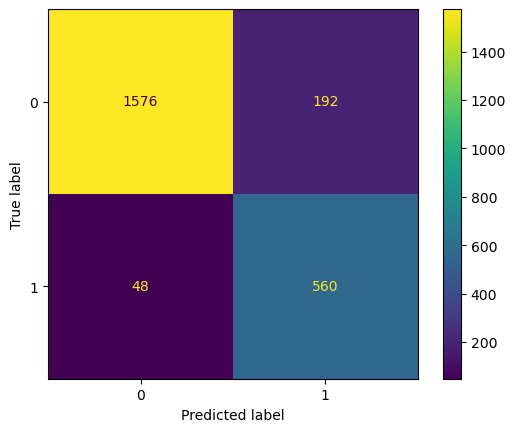

In [65]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

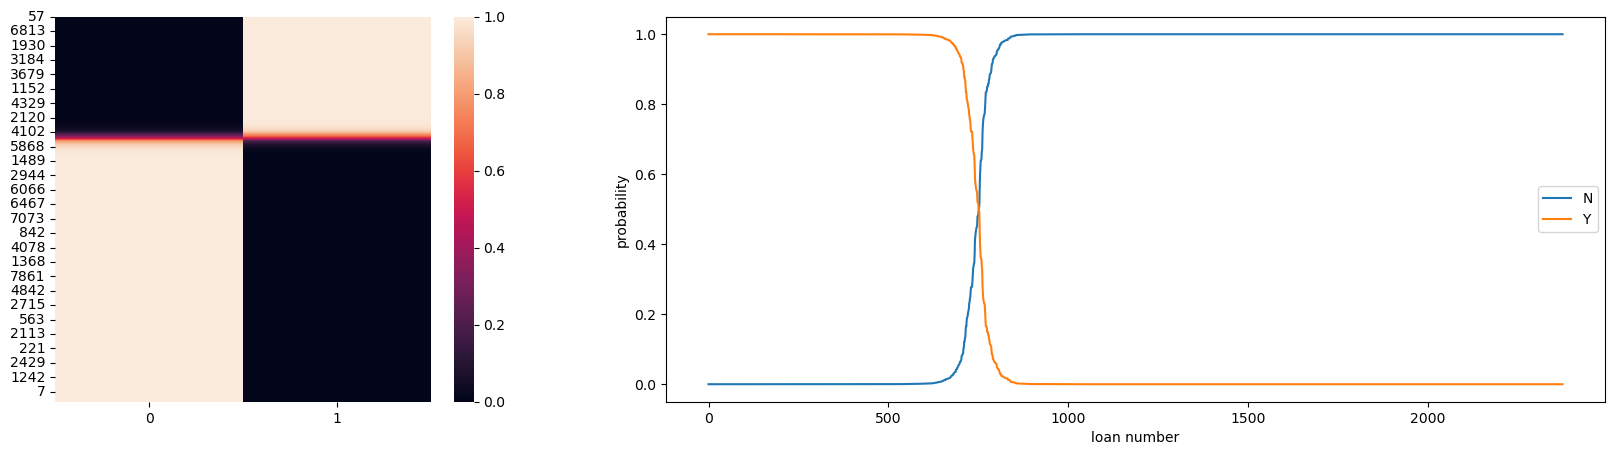

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5), gridspec_kw={'width_ratios': [1, 2]})
sns.heatmap(pred_prob.sort_values(by=0), ax=ax1)
ax2.plot(pred_prob.sort_values(by=0).values)
ax2.set_xlabel('loan number')
ax2.set_ylabel('probability')
ax2.legend(['N', 'Y'])

In [67]:
def classification_metrics(y_test, pred_pos):
    
    fig, axes = plt.subplots(2,3, figsize=(15,8))
    
    # precision-recall curve with maximum f1 score marked and confusion matrix at that point
    precision, recall, thresholds = precision_recall_curve(y_test, pred_pos)
    f1 = (2 * precision * recall) / (precision + recall)
    index_max_f1 = np.nanargmax(f1)
    f1_thresh = thresholds[index_max_f1]
    
    PrecisionRecallDisplay.from_predictions(y_test, pred_pos, ax=axes[0, 0])
    axes[0, 0].scatter(recall[index_max_f1], precision[index_max_f1], 
                       color='green', label=f'max f1 {f1[index_max_f1]:.2f} at {f1_thresh:.2f}')
    axes[0, 0].legend()

    ConfusionMatrixDisplay.from_predictions(y_test, (pred_pos > f1_thresh) * 1, ax=axes[1, 0])
    
    
    # ROC curve with maximum Youden's J marked and confusion matrix at that point
    fpr, tpr, thresholds = roc_curve(y_test, pred_pos)
    Youdens_J = tpr - fpr
    index_max_J = np.nanargmax(Youdens_J)
    J_thresh = thresholds[index_max_J]
    
    RocCurveDisplay.from_predictions(y_test, pred_pos, ax=axes[0, 1])
    axes[0, 1].scatter(fpr[index_max_J], tpr[index_max_J], 
                       color='green', label=f'max J {Youdens_J[index_max_J]:.2f} at {J_thresh:.2f}')
    axes[0, 1].plot([0, 1], [0, 1],'r--')
    axes[0, 1].legend()
    
    ConfusionMatrixDisplay.from_predictions(y_test, (pred_pos > J_thresh) * 1, ax=axes[1, 1])
    
    
    # Det curve with minimum total error marked and confusion matrix at that point
    fpr, fnr, thresholds = det_curve(y_test, pred_pos)
    error = fpr + fnr
    index_min_error = np.nanargmin(error)
    error_thresh = thresholds[index_min_error]
    
    DetCurveDisplay.from_predictions(y_test, pred_pos, ax=axes[0, 2])
    axes[0, 2].scatter(sp.stats.norm.ppf(fpr[index_min_error]), sp.stats.norm.ppf(fnr[index_min_error]),
                       color='green',label=f'min error {error[index_min_error]:.2f} at {error_thresh:.2f}')
    axes[0,2].legend()
    
    ConfusionMatrixDisplay.from_predictions(y_test, (pred_pos > error_thresh) * 1, ax=axes[1, 2])
    

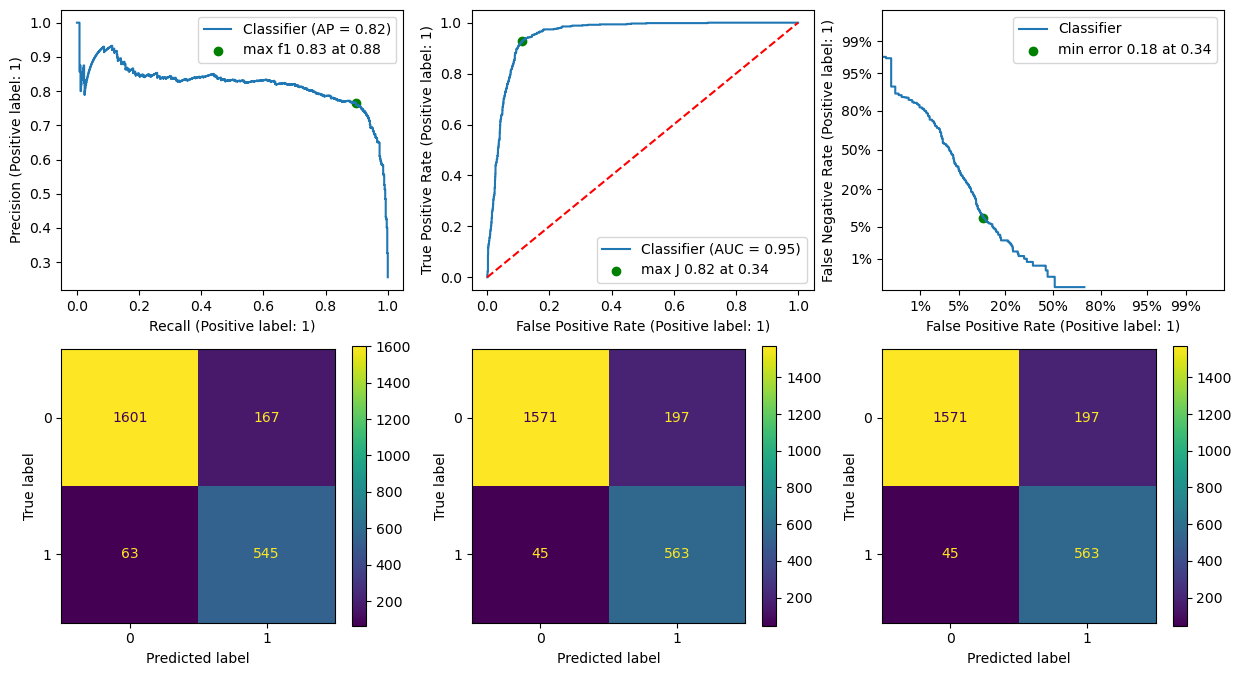

In [68]:
classification_metrics(y_test, pred_prob[1])

# test set features

In [69]:
test = pd.read_csv('test.csv')

In [70]:
test

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://insta...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the ..."
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and f..."
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for
...,...,...
1948,9869,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old. Thanks for rushing your products to market #Sams..."
1949,9870,Now Available - Hoodie. Check it out here - http://zetasupplies.co.uk/products/hoodie-2?utm_camp...
1950,9871,"There goes a crack right across the screen. If you could actually provide a more durable screen,..."
1951,9872,@codeofinterest as i said #Adobe big time we may well as include #apple to


In [71]:
test['clean tweet'] = test['tweet'].apply(lambda x: clean_text(x))

In [72]:
test

,id,tweet,clean tweet
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks,I hate the new iphone upgrade Won't let me download apps ugh apple sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://insta...,currently shitting my fucking pants apple iMac cashmoney raddest swagswagswag http instagr am p ...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the ...",I'd like to puts some CD ROMS on my iPad is that possible ' Yes but wouldn't that block the screen
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and f...",My ipod is officially dead I lost all my pictures and videos from the 1D and 5sos concert and fr...
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for,Been fighting iTunes all night I only want the music I paid for
...,...,...,...
1948,9869,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old. Thanks for rushing your products to market #Sams...",SamsungGalaxyNote7 Explodes Burns 6 Year Old Thanks for rushing your products to market Samsung ...
1949,9870,Now Available - Hoodie. Check it out here - http://zetasupplies.co.uk/products/hoodie-2?utm_camp...,Now Available Hoodie Check it out here http zetasupplies co uk products hoodie 2 utm campaign so...
1950,9871,"There goes a crack right across the screen. If you could actually provide a more durable screen,...",There goes a crack right across the screen If you could actually provide a more durable screen t...
1951,9872,@codeofinterest as i said #Adobe big time we may well as include #apple to,codeofinterest as i said Adobe big time we may well as include apple to


In [73]:
test['wordcount'] = test['clean tweet'].apply(lambda x: len(x.split()))

In [74]:
test['charcount'] = test['clean tweet'].apply(lambda x: len(x))

In [75]:
test['mentions'] = test['tweet'].apply(lambda x: x.count('@'))

In [76]:
test['hashtags'] = test['tweet'].apply(lambda x: x.count('#'))

In [77]:
test['lemmas'] = lemma(test['clean tweet'].values)

In [78]:
test['nouncount'] = noun_count(test['clean tweet'].values)

In [79]:
test['verbcount'] = verb_count(test['clean tweet'].values)

In [80]:
test['adjcount'] = adjective_count(test['clean tweet'].values)

In [81]:
test

,id,tweet,clean tweet,wordcount,charcount,mentions,hashtags,lemmas,nouncount,verbcount,adjcount
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks,I hate the new iphone upgrade Won't let me download apps ugh apple sucks,14,72,0,3,hate new iphone upgrade wo let download apps ugh apple sucks,5,4,1
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://insta...,currently shitting my fucking pants apple iMac cashmoney raddest swagswagswag http instagr am p ...,15,106,0,5,currently shitting fucking pants apple imac cashmoney raddest swagswagswag http instagr p uuis0b...,8,1,2
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the ...",I'd like to puts some CD ROMS on my iPad is that possible ' Yes but wouldn't that block the screen,21,98,0,0,like puts cd roms ipad possible ' yes block screen,4,3,1
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and f...",My ipod is officially dead I lost all my pictures and videos from the 1D and 5sos concert and fr...,24,126,0,2,ipod officially dead lost pictures videos 1d 5sos concert vet camp hatinglife sobbing,8,2,2
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for,Been fighting iTunes all night I only want the music I paid for,13,63,1,1,fighting itunes night want music paid,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...
1948,9869,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old. Thanks for rushing your products to market #Sams...",SamsungGalaxyNote7 Explodes Burns 6 Year Old Thanks for rushing your products to market Samsung ...,28,177,0,2,samsunggalaxynote7 explodes burns 6 year old thanks rushing products market samsung http gizmodo...,15,4,2
1949,9870,Now Available - Hoodie. Check it out here - http://zetasupplies.co.uk/products/hoodie-2?utm_camp...,Now Available Hoodie Check it out here http zetasupplies co uk products hoodie 2 utm campaign so...,28,171,0,4,available hoodie check http zetasupplies co uk products hoodie 2 utm campaign social autopilot u...,19,1,3
1950,9871,"There goes a crack right across the screen. If you could actually provide a more durable screen,...",There goes a crack right across the screen If you could actually provide a more durable screen t...,23,127,0,2,goes crack right screen actually provide durable screen great apple iphone,5,2,2
1951,9872,@codeofinterest as i said #Adobe big time we may well as include #apple to,codeofinterest as i said Adobe big time we may well as include apple to,14,71,1,2,codeofinterest said adobe big time include apple,3,2,1


# test predictions

In [82]:
test_count_vectors = count.transform(test['clean tweet'])

In [83]:
test_tfidf_vectors = tfidf.transform(test['clean tweet'])

In [84]:
test.columns

Index(['id', 'tweet', 'clean tweet', 'wordcount', 'charcount', 'mentions',
       'hashtags', 'lemmas', 'nouncount', 'verbcount', 'adjcount'],
      dtype='object')

In [85]:
features = ['wordcount', 'charcount', 'mentions', 'hashtags', 'nouncount', 'verbcount', 'adjcount']

In [86]:
X_test = hstack([test_count_vectors, test_tfidf_vectors, csr_matrix(test[features])])

In [87]:
predictions = model.predict(X_test)

In [88]:
predictions

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [89]:
test['id'].values

array([7921, 7922, 7923, ..., 9871, 9872, 9873], dtype=int64)

In [90]:
result = pd.DataFrame(predictions, test['id'].values).reset_index()
result.columns=['id', 'label']
result

,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,1
4,7925,1
...,...,...
1948,9869,1
1949,9870,0
1950,9871,1
1951,9872,1


In [91]:
result.to_csv('submission.csv', index=False)

# word embedding

In [92]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import TextVectorization, Dense, MaxPool1D, Embedding, Conv1D, Flatten, Dropout
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [93]:
sentences=[i.split() for i in train['clean tweet'].values]

In [94]:
max(len(i) for i in sentences)

60

In [95]:
vectorizer = TextVectorization(max_tokens=None, output_mode='int', output_sequence_length=61)

In [96]:
vectorizer = TextVectorization(max_tokens=None, output_mode='tf-idf')

In [97]:
vectorizer.adapt(train['clean tweet'].values)

In [98]:
output_vector = vectorizer(train['clean tweet'].values)

In [99]:
output_vector.shape

TensorShape([7920, 23241])

In [100]:
len(vectorizer.get_vocabulary())

23241

In [101]:
train['clean tweet'].values[458]

'Sony Xperia Z2 unboxing newphone freeupgrade sony xperiaz2 sexybeast excited gadget newtoy http instagram com p nF3h6nh1z'

In [102]:
output_vector[458]

<tf.Tensor: shape=(23241,), dtype=float32, numpy=
array([0.       , 0.       , 1.2144442, ..., 0.       , 0.       ,
       0.       ], dtype=float32)>

In [103]:
train['clean tweet'].values[4458]

'So i dropped my samsung note8 into paint today wife not http youtu be iYq7kR q0 a'

In [104]:
output_vector[4458]

<tf.Tensor: shape=(23241,), dtype=float32, numpy=
array([0.       , 0.       , 1.2144442, ..., 0.       , 0.       ,
       0.       ], dtype=float32)>

In [105]:
vocab_size = len(vectorizer.get_vocabulary())

In [106]:
X = pd.DataFrame(output_vector, index=train.index)

In [107]:
target = train['label']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, stratify=target)

## custom embedding layer

In [109]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=30, input_length=61))
model.add(Dropout(0.3))
model.add(Conv1D(filters=15, kernel_size=3, activation='relu'))
model.add(MaxPool1D())
model.add(Dense(20, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [110]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=23241))
model.add(GRU(units=64))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [111]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 23241, 50)         1162050   
                                                                 
 gru (GRU)                   (None, 64)                22272     
                                                                 
 dense_2 (Dense)             (None, 20)                1300      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1185643 (4.52 MB)
Trainable params: 1185643 (4.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [112]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [113]:
callbacks = [EarlyStopping(monitor='val_binary_accuracy', min_delta=.0001, patience=20, verbose=1, 
                           mode='max', baseline=0.5, restore_best_weights=True, start_from_epoch=10)]

In [ ]:
history = model.fit(X_train, y_train, batch_size=124, epochs=5, callbacks=callbacks, 
                    validation_data=(X_test, y_test), )

Epoch 1/5


In [ ]:
model.layers

In [149]:
model.get_weights()[0].shape

(23242, 50)

In [150]:
model.get_weights()[0]

array([[-0.0578925 , -0.0169776 ,  0.02233566, ...,  0.07200325,
        -0.01708803, -0.07892919],
       [ 0.0404839 ,  0.0303581 , -0.04303372, ..., -0.0117728 ,
         0.01152972,  0.04914207],
       [ 0.10609435,  0.1759325 ,  0.0358605 , ..., -0.10120298,
        -0.12705377,  0.13920249],
       ...,
       [-0.00297359,  0.02459151, -0.03712676, ...,  0.02477187,
        -0.02599467,  0.06983308],
       [ 0.0190342 ,  0.07484968, -0.05607916, ..., -0.00886463,
        -0.00782892, -0.01103415],
       [-0.00484079, -0.01403322, -0.02863197, ...,  0.00072278,
         0.00225361,  0.0180208 ]], dtype=float32)

In [151]:
test['clean tweet'].values

array(["I hate the new iphone upgrade Won't let me download apps ugh apple sucks",
       'currently shitting my fucking pants apple iMac cashmoney raddest swagswagswag http instagr am p UUIS0bIBZo',
       "I'd like to puts some CD ROMS on my iPad is that possible ' Yes but wouldn't that block the screen",
       ...,
       'There goes a crack right across the screen If you could actually provide a more durable screen that would be great Apple Iphone',
       'codeofinterest as i said Adobe big time we may well as include apple to',
       'Finally I got it thanx my father Samsung galaxy s3 gift father phone new http instagr am p NoxkiPE'],
      dtype=object)

In [152]:
test_vectors = vectorizer(test['clean tweet'].values)

In [153]:
test_vectors.shape

TensorShape([1953, 61])

In [154]:
model.evaluate(output_vector, train['label'])

248/248 [==============================] - 2s 6ms/step - loss: 0.1491 - binary_accuracy: 0.9549


[0.14914660155773163, 0.9549242258071899]

In [155]:
prediction = model.predict(test_vectors)

62/62 [==============================] - 1s 5ms/step


In [156]:
prediction_cat = (prediction >= 0.5).astype(int)

In [157]:
prediction_cat

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [158]:
test['id'].values

array([7921, 7922, 7923, ..., 9871, 9872, 9873], dtype=int64)

In [159]:
result = pd.DataFrame(prediction_cat, test['id'].values).reset_index()
result.columns=['id', 'label']
result

,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,1
4,7925,1
...,...,...
1948,9869,0
1949,9870,0
1950,9871,1
1951,9872,1


In [273]:
result.to_csv('submission1.csv', index=False)

## existing architecture

In [160]:
import gensim

In [103]:
sentences=[i.split() for i in train['clean tweet'].values]

In [161]:
w2v = gensim.models.Word2Vec(sentences=sentences, min_count=1)

In [162]:
type(w2v)

gensim.models.word2vec.Word2Vec

In [163]:
w2v.wv.vectors.shape

(27449, 100)

In [164]:
len(vectorizer.get_vocabulary())

23242

In [165]:
vectorizer(np.array([[s] for s in train['clean tweet'].values]))

<tf.Tensor: shape=(7920, 61), dtype=int64, numpy=
array([[ 2332, 11884,  1470, ...,     0,     0,     0],
       [  101,    13,  9074, ...,     0,     0,     0],
       [  103,    38,    31, ...,     0,     0,     0],
       ...,
       [ 4032,     7,  1646, ...,     0,     0,     0],
       [  101,    68,     7, ...,     0,     0,     0],
       [    5,  2802,     5, ...,     0,     0,     0]], dtype=int64)>

In [166]:
embedding_matrix = w2v.wv.vectors

In [177]:
for index, word in enumerate(w2v.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(w2v.wv.index_to_key)} is {word}")

word #0/27449 is http
word #1/27449 is com
word #2/27449 is p
word #3/27449 is iphone
word #4/27449 is instagram
word #5/27449 is apple
word #6/27449 is to
word #7/27449 is my
word #8/27449 is I
word #9/27449 is the


In [178]:
vocab_size = w2v.wv.vectors.shape[0]

In [184]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=61, 
                    embeddings_initializer=tf.keras.initializers.constant(embedding_matrix), trainable=False))
model.add(Dropout(0.3))
model.add(Conv1D(filters=15, kernel_size=3, activation='relu'))
model.add(MaxPool1D())
model.add(Dense(50, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [185]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 61, 100)           2744900   
                                                                 
 dropout_4 (Dropout)         (None, 61, 100)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 59, 15)            4515      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 29, 15)            0         
 g1D)                                                            
                                                                 
 dense_14 (Dense)            (None, 29, 50)            800       
                                                                 
 flatten_4 (Flatten)         (None, 1450)              0         
                                                      

In [186]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [187]:
callbacks = [EarlyStopping(monitor='val_binary_accuracy', min_delta=.0001, patience=20, verbose=1, 
                           mode='max', baseline=0.5, restore_best_weights=True, start_from_epoch=10)]

In [188]:
history = model.fit(X_train, y_train, batch_size=124, epochs=50, callbacks=callbacks, 
                    validation_data=(X_test, y_test), )

Epoch 1/50
45/45 [==============================] - 2s 27ms/step - loss: 0.5708 - binary_accuracy: 0.7415 - val_loss: 0.5233 - val_binary_accuracy: 0.7441
Epoch 2/50
45/45 [==============================] - 1s 28ms/step - loss: 0.4930 - binary_accuracy: 0.7556 - val_loss: 0.4908 - val_binary_accuracy: 0.7630
Epoch 3/50
45/45 [==============================] - 1s 28ms/step - loss: 0.4540 - binary_accuracy: 0.7704 - val_loss: 0.4306 - val_binary_accuracy: 0.7925
Epoch 4/50
45/45 [==============================] - 1s 22ms/step - loss: 0.4319 - binary_accuracy: 0.7841 - val_loss: 0.4786 - val_binary_accuracy: 0.7635
Epoch 5/50
45/45 [==============================] - 1s 26ms/step - loss: 0.4136 - binary_accuracy: 0.8034 - val_loss: 0.4199 - val_binary_accuracy: 0.7997
Epoch 6/50
45/45 [==============================] - 1s 22ms/step - loss: 0.4038 - binary_accuracy: 0.8086 - val_loss: 0.4000 - val_binary_accuracy: 0.8081
Epoch 7/50
45/45 [==============================] - 1s 22ms/step - los

In [189]:
test['clean tweet'].values

array(["I hate the new iphone upgrade Won't let me download apps ugh apple sucks",
       'currently shitting my fucking pants apple iMac cashmoney raddest swagswagswag http instagr am p UUIS0bIBZo',
       "I'd like to puts some CD ROMS on my iPad is that possible ' Yes but wouldn't that block the screen",
       ...,
       'There goes a crack right across the screen If you could actually provide a more durable screen that would be great Apple Iphone',
       'codeofinterest as i said Adobe big time we may well as include apple to',
       'Finally I got it thanx my father Samsung galaxy s3 gift father phone new http instagr am p NoxkiPE'],
      dtype=object)

In [190]:
test_vectors = vectorizer(test['clean tweet'].values)

In [266]:
test_vectors.shape

TensorShape([1953, 66])

In [267]:
model.evaluate(output_vector, train['label'])

248/248 [==============================] - 0s 2ms/step - loss: 0.1433 - binary_accuracy: 0.9581


[0.14330023527145386, 0.9580808281898499]

In [268]:
prediction = model.predict(test_vectors)

62/62 [==============================] - 0s 2ms/step


In [269]:
prediction_cat = (prediction >= 0.5).astype(int)

In [270]:
prediction_cat

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [271]:
test['id'].values

array([7921, 7922, 7923, ..., 9871, 9872, 9873], dtype=int64)

In [272]:
result = pd.DataFrame(prediction_cat, test['id'].values).reset_index()
result.columns=['id', 'label']
result

,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,1
4,7925,1
...,...,...
1948,9869,1
1949,9870,0
1950,9871,1
1951,9872,1


In [273]:
result.to_csv('submission1.csv', index=False)

## pre-trained model weights

In [191]:
wv = gensim.models.KeyedVectors.load_word2vec_format('D:\projects\GoogleNews-vectors-negative300.bin.gz', binary=True)

In [192]:
wv = gensim.models.KeyedVectors.load_word2vec_format('/home/santhosh/projects/models/GoogleNews-vectors-negative300.bin.gz', binary=True)

FileNotFoundError: [Errno 2] No such file or directory: '/home/santhosh/projects/models/GoogleNews-vectors-negative300.bin.gz'

In [193]:
wv.vectors.shape

(3000000, 300)

In [194]:
wv.get_vector('me')

array([ 1.38671875e-01, -9.17968750e-02,  3.49121094e-02,  1.50390625e-01,
       -2.57873535e-03,  8.30078125e-02, -6.22558594e-02, -1.06445312e-01,
       -1.06933594e-01,  1.70898438e-01, -1.50390625e-01, -2.39257812e-01,
        2.19726562e-02, -2.98828125e-01, -3.39843750e-01,  2.34375000e-01,
        4.44335938e-02,  8.30078125e-02, -1.75476074e-03,  9.09423828e-03,
        1.41601562e-01,  3.53515625e-01,  2.63671875e-01,  1.23046875e-01,
        1.47460938e-01, -3.95507812e-02, -1.50146484e-02, -1.23046875e-01,
        1.05468750e-01, -1.31835938e-02,  1.63085938e-01,  1.27929688e-01,
       -6.73828125e-02,  2.79541016e-02,  1.20605469e-01, -1.05957031e-01,
        1.30859375e-01,  4.10156250e-02,  6.22558594e-02,  2.79296875e-01,
        1.68945312e-01, -1.02539062e-01,  2.04101562e-01, -2.08007812e-01,
        1.21093750e-01,  2.29492188e-01,  1.85546875e-02, -1.12792969e-01,
        1.90429688e-02,  3.73535156e-02, -1.10351562e-01,  6.10351562e-02,
        1.53320312e-01,  

In [195]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [196]:
len(voc)

23242

In [197]:
num_tokens = len(voc) + 2
embedding_dim = 300
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    try:
        embedding_vector = wv.get_vector(word)
        
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            # This includes the representation for "padding" and "OOV"
            embedding_matrix[i] = embedding_vector
            hits += 1
        else:
            misses += 1
    except KeyError:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))


Converted 9554 words (13688 misses)


In [198]:
embedding_matrix.shape

(23244, 300)

In [199]:
model = Sequential()
model.add(Embedding(input_dim=num_tokens, output_dim=300, input_length=61, 
                    embeddings_initializer=tf.keras.initializers.constant(embedding_matrix), trainable=False))
model.add(Dropout(0.3))
model.add(Conv1D(filters=15, kernel_size=3, activation='relu'))
model.add(MaxPool1D())
model.add(Dense(50, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [200]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 61, 300)           6973200   
                                                                 
 dropout_5 (Dropout)         (None, 61, 300)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 59, 15)            13515     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 29, 15)            0         
 g1D)                                                            
                                                                 
 dense_16 (Dense)            (None, 29, 50)            800       
                                                                 
 flatten_5 (Flatten)         (None, 1450)              0         
                                                      

In [201]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [202]:
callbacks = [EarlyStopping(monitor='val_binary_accuracy', min_delta=.0001, patience=20, verbose=1, 
                           mode='max', baseline=0.5, restore_best_weights=True, start_from_epoch=10)]

In [203]:
history = model.fit(X_train, y_train, batch_size=124, epochs=50, callbacks=callbacks, 
                    validation_data=(X_test, y_test), )

Epoch 1/50
45/45 [==============================] - 4s 67ms/step - loss: 0.5040 - binary_accuracy: 0.7287 - val_loss: 0.3986 - val_binary_accuracy: 0.7479
Epoch 2/50
45/45 [==============================] - 3s 66ms/step - loss: 0.3438 - binary_accuracy: 0.8404 - val_loss: 0.3048 - val_binary_accuracy: 0.8750
Epoch 3/50
45/45 [==============================] - 3s 64ms/step - loss: 0.2907 - binary_accuracy: 0.8768 - val_loss: 0.2696 - val_binary_accuracy: 0.8859
Epoch 4/50
45/45 [==============================] - 3s 64ms/step - loss: 0.2627 - binary_accuracy: 0.8860 - val_loss: 0.2505 - val_binary_accuracy: 0.8872
Epoch 5/50
45/45 [==============================] - 3s 61ms/step - loss: 0.2467 - binary_accuracy: 0.8939 - val_loss: 0.2477 - val_binary_accuracy: 0.8960
Epoch 6/50
45/45 [==============================] - 3s 63ms/step - loss: 0.2357 - binary_accuracy: 0.8999 - val_loss: 0.2424 - val_binary_accuracy: 0.8944
Epoch 7/50
45/45 [==============================] - 3s 70ms/step - los

In [201]:
test['clean tweet'].values

array(["I hate the new iphone upgrade Won't let me download apps ugh apple sucks",
       'currently shitting my fucking pants apple iMac cashmoney raddest swagswagswag http instagr am p UUIS0bIBZo',
       "I'd like to puts some CD ROMS on my iPad is that possible ' Yes but wouldn't that block the screen",
       ...,
       'There goes a crack right across the screen If you could actually provide a more durable screen that would be great Apple Iphone',
       'codeofinterest as i said Adobe big time we may well as include apple to',
       'Finally I got it thanx my father Samsung galaxy s3 gift father phone new http instagr am p NoxkiPE'],
      dtype=object)

In [202]:
test_vectors = vectorizer(test['clean tweet'].values)

In [203]:
test_vectors.shape

TensorShape([1953, 61])

In [204]:
model.evaluate(output_vector, train['label'])

248/248 [==============================] - 1s 5ms/step - loss: 0.1539 - binary_accuracy: 0.9462


[0.15386202931404114, 0.946212112903595]

In [205]:
prediction = model.predict(test_vectors)

62/62 [==============================] - 0s 5ms/step


In [206]:
prediction_cat = (prediction >= 0.5).astype(int)

In [207]:
prediction_cat

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [208]:
test['id'].values

array([7921, 7922, 7923, ..., 9871, 9872, 9873])

In [209]:
result = pd.DataFrame(prediction_cat, test['id'].values).reset_index()
result.columns=['id', 'label']
result

,id,label
0,7921,1
1,7922,0
2,7923,1
3,7924,1
4,7925,1
...,...,...
1948,9869,0
1949,9870,0
1950,9871,1
1951,9872,1


In [210]:
result.to_csv('submission1.csv', index=False)